PPNET HELPER and problems of augmentation and oversampling data

In [2]:
from PIL import Image 
import os
import matplotlib.pyplot as plt
import cv2

In [3]:
with open('/home/up202003072/Documents/CUB_200_2011/CUB_200_2011/images.txt') as f:
    all_image_path= f.readlines()
    
with open("/home/up202003072/Documents/CUB_200_2011/CUB_200_2011/bounding_boxes.txt") as f:
    coordinates= f.readlines()
    

index,path=all_image_path[0].split() 
print(index,path)


['1 60.0 27.0 325.0 304.0\n', '2 139.0 30.0 153.0 264.0\n', '3 14.0 112.0 388.0 186.0\n', '4 112.0 90.0 255.0 242.0\n', '5 70.0 50.0 134.0 303.0\n', '6 33.0 53.0 251.0 395.0\n', '7 7.0 75.0 420.0 262.0\n', '8 78.0 86.0 333.0 158.0\n', '9 112.0 76.0 221.0 189.0\n', '10 27.0 4.0 199.0 201.0\n', '11 1.0 52.0 342.0 260.0\n', '12 47.0 21.0 179.0 249.0\n', '13 36.0 32.0 197.0 457.0\n', '14 37.0 40.0 262.0 184.0\n', '15 23.0 80.0 395.0 237.0\n', '16 141.0 87.0 256.0 211.0\n', '17 40.0 38.0 254.0 209.0\n', '18 45.0 58.0 254.0 249.0\n', '19 135.0 83.0 304.0 181.0\n', '20 23.0 195.0 255.0 122.0\n', '21 11.0 77.0 281.0 139.0\n', '22 5.0 4.0 210.0 130.0\n', '23 154.0 93.0 188.0 165.0\n', '24 50.0 25.0 156.0 139.0\n', '25 172.0 106.0 265.0 214.0\n', '26 37.0 61.0 409.0 180.0\n', '27 65.0 62.0 309.0 345.0\n', '28 1.0 2.0 499.0 286.0\n', '29 97.0 3.0 235.0 254.0\n', '30 90.0 29.0 224.0 211.0\n', '31 38.0 15.0 314.0 301.0\n', '32 20.0 91.0 416.0 203.0\n', '33 82.0 52.0 260.0 260.0\n', '34 66.0 115.0 3

In [7]:
coordinate=coordinates[0].split()
print(type(coordinate[0]))
coordinate=coordinate[1:5]
print(coordinate)
im=Image.open("/home/up202003072/Documents/CUB_200_2011/CUB_200_2011/images/"+path)
# #x,y,w+x,h+y for crop
imcrop=im.crop([float(coordinate[0]),float(coordinate[1]),float(coordinate[2])+float(coordinate[0]),float(coordinate[3])+float(coordinate[1])])    

<class 'str'>
['60.0', '27.0', '325.0', '304.0']


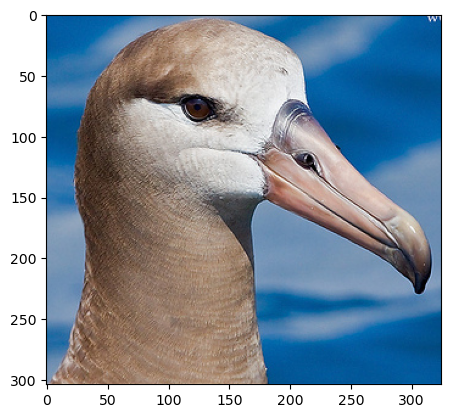

In [12]:
plt.imshow(imcrop)

Cropped images split train test

In [13]:

with open('/home/up202003072/Documents/CUB_200_2011/CUB_200_2011/images.txt') as f:
    all_image_path= f.readlines()
    
with open("/home/up202003072/Documents/CUB_200_2011/CUB_200_2011/bounding_boxes.txt") as f:
    coordinates= f.readlines()
    
with open("/home/up202003072/Documents/CUB_200_2011/CUB_200_2011/train_test_split.txt") as f:
    split= f.readlines()
    
with open("/home/up202003072/Documents/CUB_200_2011/CUB_200_2011/classes.txt") as f:
    classes= f.readlines()
    
with open("/home/up202003072/Documents/CUB_200_2011/CUB_200_2011/image_class_labels.txt") as f:
    image_classes= f.readlines()

count = len(open("/home/up202003072/Documents/CUB_200_2011/CUB_200_2011/images.txt").readlines())
for i in range (count):
    index_image,path=all_image_path[i].split()
    coordinate=coordinates[i].split()
    coordinate=coordinate[1:5]
    im=Image.open("/home/up202003072/Documents/CUB_200_2011/CUB_200_2011/images/"+path)
    #x,y,w+x,h+y for crop
    imcrop=im.crop([float(coordinate[0]),float(coordinate[1]),float(coordinate[2])+float(coordinate[0]),float(coordinate[3])+float(coordinate[1])])
    p=path.split("/")
    name=p[1]
    s=split[i].split()
    for a in range(count):
        image_classe=image_classes[a].split()
        if index_image==image_classe[0]:
            index_class=image_classe[1]
    for a in range(200):
        classe=classes[a].split()
        if classe[0]==index_class:
            classe_save=classe[1]
    if s[1]=='1':
        path='/home/up202003072/Documents/ProtoPNet/datasets/cub200_cropped/train_cropped/'+classe_save
        if not os.path.exists(path):
            os.makedirs(path)
        imcrop.save(path+'/'+name, 'JPEG')
    elif s[1]=='0':
        path='/home/up202003072/Documents/ProtoPNet/datasets/cub200_cropped/test_cropped/'+classe_save
        if not os.path.exists(path):
            os.makedirs(path)
        imcrop.save(path+'/'+name, 'JPEG')
    

Medical dataset

Train

In [2]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from skimage.io import imread
from torch.utils.data import Dataset
import numpy as np
from PIL import Image
from skimage.io import imread
import ast
import cv2 
import xml.etree.ElementTree as ET
import csv

VOC_BBOX_LABEL_NAMES = (
  # 'boneanomaly', 
  # 'bonelesion',
  # 'foreignbody',
  'fracture',
  'metal',
  #'periostealreaction',
  #'pronatorsign',
  'softtissue'
  #'text' 
)

split = 'train_3L'
data_dir = "/home/up202003072/Documents/GRAZPEDWRI-DX/pascalvoc"
id_list_file = os.path.join(data_dir, '{0}.txt'.format(split))
ids = [id_.strip() for id_ in open(id_list_file)]
for i in range(len(ids)):
    id_ = ids[i]
    xml_path = os.path.join(data_dir, id_ + '.xml')
    with open(xml_path, 'r') as f:
        tree = ET.parse(f)
        classe = []
        coordinates = []
        for obj in tree.findall('object'):
            im = cv2.imread(os.path.join(data_dir, 'images', id_ + '.png'))
            #plt.imshow(im)
            #print(type(im))
            #print("Shape of the image", im.shape)
            name = obj.find('name').text.lower().strip()
            if name in ['boneanomaly', 'bonelesion', 'foreignbody', 'periostealreaction', 'pronatorsign', 'text']:
                continue
            bndbox_anno = obj.find('bndbox')
            # subtract 1 to make pixel indexes 0-based
            coordinates.append([
                int(float(bndbox_anno.find(tag).text)) - 1 #antes estava int sem o float
                for tag in ('ymin', 'xmin', 'ymax', 'xmax')])
            classe.append(VOC_BBOX_LABEL_NAMES.index(name))

        #print(classe)
        # print(coordinates)

        im = Image.fromarray(cv2.cvtColor(im, cv2.COLOR_BGR2RGB))

        
        for j, b in enumerate(coordinates):
            left = float(b[1]) #xmin
            top = float(b[0]) #ymin
            right = float(b[3]) #xmax
            bottom = float(b[2]) #ymax
            imcrop = im.crop([left, top, right, bottom])
            name = id_ + '_' + str(j) + '.png'
            label = classe[j]
            
        direc = "/home/up202003072/Documents/ProtoPNet/datasets/bone_cropped/training/" + str(label) + '/'
        os.makedirs(direc, exist_ok=True)  
        imcrop.save(os.path.join(direc, name), "PNG")


In [5]:

im = cv2.imread("/home/up202003072/Documents/GRAZPEDWRI-DX/pascalvoc/images/"+test_image_name)
im = Image.fromarray(cv2.cvtColor(im, cv2.COLOR_BGR2RGB))
b = [  0.     , 621.57214, 474.     , 874.     ]
left = float(b[1]) #xmin
top = float(b[0]) #ymin
right = float(b[3]) #xmax
bottom = float(b[2]) #ymax
imcrop = im.crop([left, top, right, bottom])
imcrop.save('/home/up202003072/Documents/exp1.png')

In [4]:
import cv2
import matplotlib.pyplot as plt

test_image_name = "5986_1287687615_01_WRI-R2_M016.png"
image = cv2.imread("/home/up202003072/Documents/GRAZPEDWRI-DX/pascalvoc/images/"+test_image_name)
b = [ 104.93661, 138.70116, 171.52557, 244.38295]
start_point = (int(b[0]), int(b[1]))
end_point = (int(b[2]), int(b[3]))
image = cv2.rectangle(image, start_point, end_point, (255, 0, 0), 2)
image = image[...,::-1] #Converts the image from BGR format to RGB format using the NumPy slicing operation image[...,::-1]. This reverses the order of the color channels.
plt.imsave("/home/up202003072/Documents/exp1.png", image)

In [5]:
import ipdb
import matplotlib
from tqdm import tqdm

# fix for ulimit
# https://github.com/pytorch/pytorch/issues/973#issuecomment-346405667
import resource
import torchvision.datasets as datasets
import torchvision.transforms as transforms

import torch
from torch.utils.data import DataLoader
from torch.autograd import Variable
import numpy as np
#from utils_kitty.datasets import*
import torchvision
import cv2


def read_image(path, dtype=np.float32, color=True):
    """Read an image from a file.
    This function reads an image from given file. The image is CHW format and
    the range of its value is :math:`[0, 255]`. If :obj:`color = True`, the
    order of the channels is RGB.
    Args:
        path (str): A path of image file.
        dtype: The type of array. The default value is :obj:`~numpy.float32`.
        color (bool): This option determines the number of channels.
            If :obj:`True`, the number of channels is three. In this case,
            the order of the channels is RGB. This is the default behaviour.
            If :obj:`False`, this function returns a grayscale image.
    Returns:
        ~numpy.ndarray: An image.
    """

    # f = Image.open(path)
    # try:
    #     if color:
    #         # if the image is grayscale, stack it three times to get an RGB image
    #         #img = f.convert('RGB') if f.mode != 'L' else Image.merge("RGB", (f,f,f))
    #         img = f.convert('RGB')
    #     else:
    #         img = f.convert('L') 
    #     img = np.asarray(img, dtype=dtype)
    # finally:
    #     if hasattr(f, 'close'):
    #         f.close()

    # if img.ndim == 2:
    #     # reshape (H, W) -> (1, H, W)
    #     return img[np.newaxis]
    
    # else:
    #     # transpose (H, W, C) -> (C, H, W)
    #     return img.transpose((2, 0, 1))   
     
    img = cv2.imread(path)
    if img is None:
        raise ValueError("Unable to read image at path: {}".format(path))

    if color:
        # convert BGR to RGB
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        #print(img.shape)
    else:
        # convert to grayscale
        img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img = np.asarray(img, dtype=dtype)
    #print(type(img))
    
    
    if img.ndim == 2:
        # reshape (H, W) -> (1, H, W)
        return img[np.newaxis]
        
    else:
        # transpose (H, W, C) -> (C, H, W)
        return img.transpose((2, 0, 1))
    
import os
import torch as t
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
pred_bboxes_ = [ 104.93661, 138.70116, 171.52557, 244.38295]
real_label
image = read_image("/home/up202003072/Documents/GRAZPEDWRI-DX/pascalvoc/images/"+test_image_name)
image = torch.from_numpy(image)[None]
image= at.tonumpy(img[0]).reshape(-1)
pred_bboxes_ = at.tonumpy(pred_bboxes_[0]).reshape(-1)
fig = plot.figure()
ax = fig.add_subplot(1, 1, 1)
image = image.transpose((1, 2, 0))
ax.imshow(image.astype(np.uint8))
xy = (pred_bboxes_[1], pred_bboxes_[0])
height = pred_bboxes_[2] - pred_bboxes_[0]
width = pred_bboxes_[3] - pred_bboxes_[1]
ax.add_patch(plot.Rectangle(
    xy, width, height, fill=False, edgecolor='red', linewidth=2))

# start_point = (int(pred_bboxes_[0][0][0]), int(pred_bboxes_[0][0][1]))
# end_point = (int(pred_bboxes_[0][0][2]), int(pred_bboxes_[0][0][3]))
# image = cv2.rectangle(image, start_point, end_point, (255, 0, 0), 2)
image = image[...,::-1] #Converts the image from BGR format to RGB format using the NumPy slicing operation image[...,::-1]. This reverses the order of the color channels.
plt.savefig("/home/up202003072/Documents/faster_protoPnet/explained/most_activated_prototypes/original_image.png", image)
#plt.imsave("/home/up202003072/Documents/faster_protoPnet/explained/most_activated_prototypes/original_image.png", image)


In [2]:
import numpy as np

pred_labels_ = [np.array([0, 1], dtype=np.int32)]
pred_bboxes_ = [np.array([[0.0, 621.57214, 474.0, 874.0],
                          [287.4538, 685.8163, 472.9964, 874.0]], dtype=np.float32)]

index = np.where(pred_labels_[0] == 1)[0]

selected_bbox = pred_bboxes_[0][index]

print(selected_bbox)

[[287.4538 685.8163 472.9964 874.    ]]


separado code

In [85]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from skimage.io import imread
from torch.utils.data import Dataset
import numpy as np
from PIL import Image
from skimage.io import imread
import ast
import cv2 
import xml.etree.ElementTree as ET
import csv

VOC_BBOX_LABEL_NAMES = (
  'fracture',
  'metal',
  'periostealreaction',
  'pronatorsign',
  'softtissue'
)

split = 'train2'
id_list_file = os.path.join("/home/up202003072/Documents/GRAZPEDWRI-DX/pascalvoc", '{0}.txt'.format(split))
ids = [id_.strip() for id_ in open(id_list_file)]
id_ = ids[6]
data_dir = "/home/up202003072/Documents/GRAZPEDWRI-DX/pascalvoc"
xml_path = os.path.join(data_dir, id_ + '.xml')
with open(xml_path, 'r') as f:
    tree = ET.parse(f)
    classe = []
    coordinates = []
    for obj in tree.findall('object'):
        im = cv2.imread(os.path.join(data_dir, 'images', id_ + '.png'))
        #plt.imshow(im)
        #print(type(im))
        #print("Shape of the image", im.shape)
        name = obj.find('name').text.lower().strip()
        if name in ['boneanomaly', 'bonelesion', 'foreignbody', 'text']:
            continue
        bndbox_anno = obj.find('bndbox')
        # subtract 1 to make pixel indexes 0-based
        coordinates.append([
            int(float(bndbox_anno.find(tag).text)) - 1 #antes estava int sem o float
            for tag in ('ymin', 'xmin', 'ymax', 'xmax')])
        classe.append(VOC_BBOX_LABEL_NAMES.index(name))

    # print(classe)
    # print(coordinates)

    im = Image.fromarray(cv2.cvtColor(im, cv2.COLOR_BGR2RGB))

    
    for i, b in enumerate(coordinates):
        left = float(b[1])
        top = float(b[0])
        right = float(b[3])
        bottom = float(b[2])
        imcrop = im.crop([left, top, right, bottom])
        #cropped_image=img_variable[:,:,int(pred_bboxes_[0][0][0]):int(pred_bboxes_[0][0][2]),int(pred_bboxes_[0][0][1]):int(pred_bboxes_[0][0][3])]
        #name = id_ + '.png'
        # print(i)
        # print(b)
        # print(classe[i])

        # print(left,top,right,bottom)
        #plt.imshow(imcrop)
        name = id_ + '_' + str(i) + '.png'
        label = classe[i]
        
        direc = "/home/up202003072/Documents/ProtoPNet/datasets/bone_cropped/training/" + str(label) + '/'
        os.makedirs(direc, exist_ok=True)  
        imcrop.save(os.path.join(direc, name), "PNG")
        
        # if classe[i] == 0:
        #     direc = "/home/up202003072/Documents/ProtoPNet/datasets/bone_cropped/testing/" + str(classe[i]) + '/'
        #     os.makedirs(direc, exist_ok=True)  
        #     imcrop.save(os.path.join(direc, name), "PNG")
        # elif classe[i] == 1 or classe[i] == 2 or classe[i] == 3 or classe[i] == 4:
        #     direc = "/home/up202003072/Documents/ProtoPNet/datasets/bone_cropped/testing/" + str(classe[i]) + '/'
        #     os.makedirs(direc, exist_ok=True) 
        #     imcrop.save(os.path.join(direc, name), "PNG")

Test

In [3]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from skimage.io import imread
from torch.utils.data import Dataset
import numpy as np
from PIL import Image
from skimage.io import imread
import ast
import cv2 
import xml.etree.ElementTree as ET
import csv

VOC_BBOX_LABEL_NAMES = (
  # 'boneanomaly', 
  # 'bonelesion',
  # 'foreignbody',
  'fracture',
  'metal',
  #'periostealreaction',
  #'pronatorsign',
  'softtissue'
  #'text' 
)

split = 'test_3L'
data_dir = "/home/up202003072/Documents/GRAZPEDWRI-DX/pascalvoc"
id_list_file = os.path.join(data_dir, '{0}.txt'.format(split))
ids = [id_.strip() for id_ in open(id_list_file)]
for i in range(len(ids)):
    id_ = ids[i]
    xml_path = os.path.join(data_dir, id_ + '.xml')
    with open(xml_path, 'r') as f:
        tree = ET.parse(f)
        classe = []
        coordinates = []
        for obj in tree.findall('object'):
            im = cv2.imread(os.path.join(data_dir, 'images', id_ + '.png'))
            #plt.imshow(im)
            #print(type(im))
            #print("Shape of the image", im.shape)
            name = obj.find('name').text.lower().strip()
            if name in ['boneanomaly', 'bonelesion', 'foreignbody', 'periostealreaction', 'pronatorsign', 'text']:
                continue
            bndbox_anno = obj.find('bndbox')
            # subtract 1 to make pixel indexes 0-based
            coordinates.append([
                int(float(bndbox_anno.find(tag).text)) - 1 #antes estava int sem o float
                for tag in ('ymin', 'xmin', 'ymax', 'xmax')])
            classe.append(VOC_BBOX_LABEL_NAMES.index(name))

        #print(classe)
        # print(coordinates)

        im = Image.fromarray(cv2.cvtColor(im, cv2.COLOR_BGR2RGB))

        
        for j, b in enumerate(coordinates):
            left = float(b[1])
            top = float(b[0])
            right = float(b[3])
            bottom = float(b[2])
            imcrop = im.crop([left, top, right, bottom])
            name = id_ + '_' + str(j) + '.png'
            label = classe[j]
            
        direc = "/home/up202003072/Documents/ProtoPNet/datasets/bone_cropped/testing/" + str(label) + '/'
        os.makedirs(direc, exist_ok=True)  
        imcrop.save(os.path.join(direc, name), "PNG")


Local analise

In [ ]:
 from __future__ import  absolute_import
import os

import ipdb
import matplotlib
from tqdm import tqdm

from config import opt
from dataset_main import Dataset, TestDataset, inverse_normalize
from faster_rcnn_vgg16 import FasterRCNNVGG16
from torch.utils import data as data_
from trainer import FasterRCNNTrainer
import array_tool as at
from vis_tool import visdom_bbox
from eval_tool import eval_detection_voc
from settings import base_architecture, img_size, prototype_shape, num_classes,prototype_activation_function, add_on_layers_type, experiment_run, joint_optimizer_lrs, joint_lr_step_size,warm_optimizer_lrs,last_layer_optimizer_lr,coefs,num_train_epochs, num_warm_epochs, push_start, push_epochs

from torch.utils.data import WeightedRandomSampler, DataLoader

# fix for ulimit
# https://github.com/pytorch/pytorch/issues/973#issuecomment-346405667
import resource
import torchvision.datasets as datasets
import torchvision.transforms as transforms

import torch
from torch.utils.data import DataLoader
from torch.autograd import Variable
import numpy as np
#from utils_kitty.datasets import*
import torchvision   
    

# faster_rcnn_t= FasterRCNNVGG16()
# print("Testing")
# trainer.load(best_path)
# faster_rcnn_t=trainer.faster_rcnn
# eval_result = eval(test_dataloader, faster_rcnn_t, trainer,test_num=2757)
# print("t-mAP")
# print(eval_result["map"])

# #specify the test image to be analyzed
test_image_dir = "/home/up202003072/Documents/GRAZPEDWRI-DX/pascalvoc/images/"#'DIRETORIO ONDE TEM A IMAGEM QE PRETENDEMOS ANALISAR
test_image_name = "2049_0573975938_05_WRI-L1_M015.png" #'Painted_Bunting_0081_15230.jpg' # uma imagem test expecifica DENTRO DO DIRETORIO DAS IMAGENS 
test_image_label = 0 #label: 0,1,2 FRACTURE
test_image_path = os.path.join(test_image_dir, test_image_name)

##### HELPER FUNCTIONS FOR PLOTTING
import matplotlib.pyplot as plt
import cv2
from PIL import Image
load_model_dir="/home/up202003072/Documents/faster_protoPnet/proto"
load_img_dir = load_model_dir
    

def save_prototype(fname, epoch, index):
        p_img = plt.imread(os.path.join(load_img_dir, 'epoch-'+str(epoch), 'prototype-img'+str(index)+'.png'))
        #plt.axis('off')
        plt.imsave(fname, p_img)
    
def save_prototype_self_activation(fname, epoch, index):
        p_img = plt.imread(os.path.join(load_img_dir, 'epoch-'+str(epoch),
                                        'prototype-img-original_with_self_act'+str(index)+'.png'))
        #plt.axis('off')
        plt.imsave(fname, p_img)

def save_prototype_original_img_with_bbox(fname, epoch, index,
                                            bbox_height_start, bbox_height_end,
                                            bbox_width_start, bbox_width_end, color=(0, 255, 255)):
        p_img_bgr = cv2.imread(os.path.join(load_img_dir, 'epoch-'+str(epoch), 'prototype-img-original'+str(index)+'.png'))
        cv2.rectangle(p_img_bgr, (bbox_width_start, bbox_height_start), (bbox_width_end-1, bbox_height_end-1),
                    color, thickness=2)
        p_img_rgb = p_img_bgr[...,::-1]
        p_img_rgb = np.float32(p_img_rgb) / 255
        #plt.imshow(p_img_rgb)
        #plt.axis('off')
        plt.imsave(fname, p_img_rgb)

def imsave_with_bbox(fname, img_rgb, bbox_height_start, bbox_height_end,
                        bbox_width_start, bbox_width_end, color=(0, 255, 255)):
        img_bgr_uint8 = cv2.cvtColor(np.uint8(255*img_rgb), cv2.COLOR_RGB2BGR)
        cv2.rectangle(img_bgr_uint8, (bbox_width_start, bbox_height_start), (bbox_width_end-1, bbox_height_end-1),
                    color, thickness=2)
        img_rgb_uint8 = img_bgr_uint8[...,::-1]
        img_rgb_float = np.float32(img_rgb_uint8) / 255
        #plt.imshow(img_rgb_float)
        #plt.axis('off')
        plt.imsave(fname, img_rgb_float)

def normalize_function(x):
        """
        Normalize a list of sample image data in the range of 0 to 1
        : x: List of image data.  The image shape is (32, 32, 3)
        : return: Numpy array of normalized data
        """
        return np.array((x - np.min(x)) / (np.max(x) - np.min(x)))

    # load the test image and forward it through the network_______________________________________________--
from preprocess import mean, std, preprocess_input_function, undo_preprocess_input_function
from log import create_logger
save_analysis_path="/home/up202003072/Documents/faster_protoPnet/explained/"
log, logclose = create_logger(log_filename=os.path.join(save_analysis_path, 'local_analysis.log'))
normalize = transforms.Normalize(mean=mean,
                                    std=std)
preprocess = transforms.Compose([
    transforms.ToTensor(),
    normalize
    ])

img_pil = Image.open(test_image_path)
img_tensor = preprocess(img_pil).permute(0,2,1)
img_variable = Variable(img_tensor.unsqueeze(0))

img=np.array(Image.open(test_image_path))
img=normalize_function(img)
img=inverse_normalize(img)
img = np.transpose(img, (2, 1, 0))
img=torch.from_numpy(img).float()

pred_bboxes_, pred_labels_, pred_scores_ ,logits,min_distances,_,_= faster_rcnn_t.predict(img, [sizes])
# pred_bboxes_, pred_labels_, pred_scores_ ,logits,min_distances,_,_= faster_rcnn_t.predict([img],visualize=True)
cropped_image=img_variable[:,:,int(pred_bboxes_[0][0][0]):int(pred_bboxes_[0][0][2]),int(pred_bboxes_[0][0][1]):int(pred_bboxes_[0][0][3])]
images_test = img_variable.cuda()
labels_test = torch.tensor([test_image_label])

image = cv2.imread("/home/up202003072/Documents/GRAZPEDWRI-DX/pascalvoc/images/"+test_image_name)
start_point = (int(pred_bboxes_[0][0][0]), int(pred_bboxes_[0][0][1]))
end_point = (int(pred_bboxes_[0][0][2]), int(pred_bboxes_[0][0][3]))
image = cv2.rectangle(image, start_point, end_point, (255, 0, 0), 2)
image = image[...,::-1]
plt.imsave("/home/up202003072/Documents/faster_protoPnet/explained/most_activated_prototypes/original_image.png", image)

epoch_number_str=11
prototype_info = np.load(os.path.join(load_img_dir, 'epoch-'+str(epoch_number_str), 'bb'+str(epoch_number_str)+'.npy'))
prototype_img_identity = prototype_info[:, -1]

log('Prototypes are chosen from ' + str(len(set(prototype_img_identity))) + ' number of classes.')
log('Their class identities are: ' + str(prototype_img_identity))

#sanity check 
# confirm prototype connects most strongly to its own class
prototype_max_connection = torch.argmax(faster_rcnn_t.head.ppnet.last_layer.weight, dim=0)
prototype_max_connection = prototype_max_connection.cpu().numpy()
if np.sum(prototype_max_connection == prototype_img_identity) == faster_rcnn_t.head.ppnet.num_prototypes:
    log('All prototypes connect most strongly to their respective classes.')
else:
    log('WARNING: Not all prototypes connect most strongly to their respective classes.')

# logits, min_distances = faster_rcnn.head.ppnet_multi(images_test)
scale=1
a=faster_rcnn_t.extractor(images_test)
rpn_locs, rpn_scores, rois, roi_indices, anchor=faster_rcnn_t.rpn(a, torch.Tensor([1224,370]),scale)


roi_indices = at.totensor(roi_indices).float()
rois = at.totensor(rois).float()
indices_and_rois = torch.cat([roi_indices[:, None], rois], dim=1)
    # NOTE: important: yx->xy
xy_indices_and_rois = indices_and_rois[:, [0, 2, 1, 4, 3]]
indices_and_rois =  xy_indices_and_rois.contiguous()
pool=faster_rcnn_t.head.roi(a,indices_and_rois)


conv_output, distances = faster_rcnn_t.head.ppnet.push_forward(pool)
min_distances=torch.Tensor(min_distances)
    #min_distances = min_distances.view(-1, n_prototypes)
prototype_activations = faster_rcnn_t.head.ppnet.distance_2_similarity(min_distances)
prototype_activation_patterns = faster_rcnn_t.head.ppnet.distance_2_similarity(distances)

prototype_shape = faster_rcnn_t.head.ppnet.prototype_shape
max_dist = prototype_shape[1] * prototype_shape[2] * prototype_shape[3]
if faster_rcnn_t.head.ppnet.prototype_activation_function == 'linear':
        prototype_activations = prototype_activations + max_dist
        prototype_activation_patterns = prototype_activation_patterns + max_dist


logits=torch.Tensor(logits)
tables = []
for i in range(logits.size(0)):
        tables.append((torch.argmax(logits[0], dim=1)[i].item(), labels_test[i].item()))
        log(str(i) + ' ' + str(tables[-1]))

idx = 0
predicted_cls = tables[idx][0]
correct_cls = tables[idx][1]
log('Predicted: ' + str(predicted_cls))
log('Actual: ' + str(correct_cls))
#original_img = torchvision.transforms.Resize((112,112))(cropped_image)
original_img=cropped_image
size=original_img.size()
original_img = original_img.numpy()
original_img = np.transpose(original_img[0], (2, 1, 0))
original_img=normalize_function(original_img)

    ##### MOST ACTIVATED (NEAREST) 10 PROTOTYPES OF THIS IMAGE
from helpers import makedir, find_high_activation_crop
makedir(os.path.join(save_analysis_path, 'most_activated_prototypes'))

start_epoch_number=11
epoch_number_str=11
prototype_info = np.load(os.path.join(load_img_dir, 'epoch-'+str(epoch_number_str), 'bb'+str(epoch_number_str)+'.npy'))
prototype_img_identity = prototype_info[:, -1]
prototype_max_connection = torch.argmax(faster_rcnn_t.head.ppnet.last_layer.weight, dim=0)
log('Most activated 10 prototypes of this image:')
array_act, sorted_indices_act = torch.sort(prototype_activations[idx])
sorted_indices_act=sorted_indices_act[0]
array_act=array_act[0]
for i in range(1,11):
    if prototype_img_identity[sorted_indices_act[-i].item()]==predicted_cls:
        log('top {0} activated prototype for this image:'.format(i))
        save_prototype(os.path.join(save_analysis_path, 'most_activated_prototypes',
                                    'top-%d_activated_prototype.png' % i),
                    start_epoch_number, sorted_indices_act[-i].item())
        save_prototype_original_img_with_bbox(fname=os.path.join(save_analysis_path, 'most_activated_prototypes',
                                                                'top-%d_activated_prototype_in_original_pimg.png' % i),
                                            epoch=start_epoch_number,
                                            index=sorted_indices_act[-i].item(),
                                            bbox_height_start=prototype_info[sorted_indices_act[-i].item()][1],
                                            bbox_height_end=prototype_info[sorted_indices_act[-i].item()][2],
                                            bbox_width_start=prototype_info[sorted_indices_act[-i].item()][3],
                                            bbox_width_end=prototype_info[sorted_indices_act[-i].item()][4],
                                            color=(0, 255, 255))
        save_prototype_self_activation(os.path.join(save_analysis_path, 'most_activated_prototypes',
                                                    'top-%d_activated_prototype_self_act.png' % i),
                                    start_epoch_number, sorted_indices_act[-i].item())
        log('prototype index: {0}'.format(sorted_indices_act[-i].item()))
        log('prototype class identity: {0}'.format(prototype_img_identity[sorted_indices_act[-i].item()]))
        if prototype_max_connection[sorted_indices_act[-i].item()] != prototype_img_identity[sorted_indices_act[-i].item()]:
            log('prototype connection identity: {0}'.format(prototype_max_connection[sorted_indices_act[-i].item()]))
        log('activation value (similarity score): {0}'.format(array_act[-i]))
        log('last layer connection with predicted class: {0}'.format( faster_rcnn_t.head.ppnet.last_layer.weight[predicted_cls][sorted_indices_act[-i].item()]))
    
        activation_pattern = prototype_activation_patterns[idx][sorted_indices_act[-i].item()].detach().cpu().numpy()
        upsampled_activation_pattern = cv2.resize(activation_pattern, dsize=(size[2], size[3]),
                                                interpolation=cv2.INTER_CUBIC)
    
        # show the most highly activated patch of the image by this prototype
        high_act_patch_indices = find_high_activation_crop(upsampled_activation_pattern)
        high_act_patch = original_img[high_act_patch_indices[0]:high_act_patch_indices[1],
                                    high_act_patch_indices[2]:high_act_patch_indices[3], :]
        log('most highly activated patch of the chosen image by this prototype:')
        #plt.axis('off')
        plt.imsave(os.path.join(save_analysis_path, 'most_activated_prototypes',
                                'most_highly_activated_patch_by_top-%d_prototype.png' % i),
                high_act_patch)
        log('most highly activated patch by this prototype shown in the original image:')
        imsave_with_bbox(fname=os.path.join(save_analysis_path, 'most_activated_prototypes',
                                'most_highly_activated_patch_in_original_img_by_top-%d_prototype.png' % i),
                        img_rgb=original_img,
                        bbox_height_start=high_act_patch_indices[0],
                        bbox_height_end=high_act_patch_indices[1],
                        bbox_width_start=high_act_patch_indices[2],
                        bbox_width_end=high_act_patch_indices[3], color=(0, 255, 255))
    
        # show the image overlayed with prototype activation map
        rescaled_activation_pattern = upsampled_activation_pattern - np.amin(upsampled_activation_pattern)
        rescaled_activation_pattern = rescaled_activation_pattern / np.amax(rescaled_activation_pattern)
        heatmap = cv2.applyColorMap(np.uint8(255*rescaled_activation_pattern), cv2.COLORMAP_JET)
        heatmap = np.float32(heatmap) / 255
        heatmap = heatmap[...,::-1]
        overlayed_img = 0.5 * original_img + 0.3 * heatmap
        log('prototype activation map of the chosen image:')
        #plt.axis('off')
        plt.imsave(os.path.join(save_analysis_path, 'most_activated_prototypes',
                                'prototype_activation_map_by_top-%d_prototype.png' % i),
                overlayed_img)
        log('--------------------------------------------------------------')

Augmentation

aug individuaus 

In [2]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from skimage.io import imread
from torch.utils.data import Dataset
import numpy as np
from PIL import Image
from skimage.io import imread
import ast
import cv2 
import xml.etree.ElementTree as ET
import csv

image = cv2.imread('/home/up202003072/Documents/ProtoPNet/datasets/bone_cropped/training/1/0055_0844133053_01_WRI-L1_F015_2.png')

# import package
import Augmentor

# initialize pipeline
p = Augmentor.DataPipeline([np.array(image)])

# apply augmentations

#p.rotate(probability=1, max_left_rotation=15, max_right_rotation=15)
p.flip_left_right(probability=0.5)
# p.shear(probability=1, max_shear_left=10, max_shear_right=10)
# p.skew(probability=1, magnitude=0.2)  # max 45 degrees

# p.zoom_random(1, percentage_area=0.9)

# sample from augmentation pipeline
images_aug = p.sample(1)
# visualize augmented image
augmented_image = images_aug[0]
# augmented_mask = images_aug[0][1]

# visualize augmented image and mask
fig, ax = plt.subplots(0,1, figsize = (15, 10))

ax[0].axis('off')
ax[0].imshow(image)
ax[0].set_title('original image')

ax[1].axis('off')
ax[1].imshow(augmented_image)
ax[1].set_title('augmented image')

# Show the plots
plt.show()

ValueError: Number of rows must be a positive integer, not 0

<Figure size 1500x1000 with 0 Axes>

In [9]:
import imgaug.augmenters as iaa
import cv2

def apply_augmentations(image_path, output_path):
    image = cv2.imread(image_path)
    
    augmentations = [
        #iaa.Rotate(rotate=(-15, 15)),
        #iaa.Fliplr(0.5),
        #iaa.ShearX(shear=(-10, 10)),
        #iaa.ShearY(shear=(-10, 10)),
        ##iaa.Skew(magnitude=0.2),
        #iaa.Affine(scale=(0.9, 1.1)),
    ]
    

    seq = iaa.Sequential(augmentations)
    augmented_image = seq(image=image)
    

    cv2.imwrite(output_path, augmented_image)


image_path = "/home/up202003072/Documents/ProtoPNet/datasets/bone_cropped/training/1/0055_0844133053_01_WRI-L1_F015_2.png"
output_path = "/home/up202003072/Documents/augmented_image.png"
apply_augmentations(image_path, output_path)

AttributeError: module 'imgaug.augmenters' has no attribute 'Skew'

In [4]:
import Augmentor
import os
def makedir(path):
    '''
    if path does not exist in the file system, create it
    '''
    if not os.path.exists(path):
        os.makedirs(path)

datasets_root_dir = '/home/up202003072/Documents/ProtoPNet/datasets/bone_cropped/'
dir = datasets_root_dir + 'training/'
target_dir = datasets_root_dir + 'train_cropped_augmented/'

makedir(target_dir)
folders = [os.path.join(dir, folder) for folder in next(os.walk(dir))[1]]
target_folders = [os.path.join(target_dir, folder) for folder in next(os.walk(dir))[1]]

for i in range(1):
    fd = folders[i]
    tfd = target_folders[i]
    # rotation
    p = Augmentor.Pipeline('/home/up202003072/Documents/ProtoPNet/datasets/bone_cropped/training')
    p.rotate_without_crop(probability=1, max_left_rotation=15, max_right_rotation=15)
    p.flip_left_right(probability=0.5)
    for i in range(10):
        p.process()
    del p
    # skew
    p = Augmentor.Pipeline('/home/up202003072/Documents/ProtoPNet/datasets/bone_cropped/training')
    p.skew(probability=1, magnitude=0.2)  # max 45 degrees
    p.flip_left_right(probability=0.5)
    for i in range(10):
        p.process()
    del p
    # shear
    # p = Augmentor.Pipeline('/home/up202003072/Documents/ProtoPNet/datasets/bone_cropped/training')
    # p.shear(probability=1, max_shear_left=10, max_shear_right=10)
    # p.flip_left_right(probability=0.5)
    # for i in range(10):
    #     p.process()
    # del p

Initialised with 11034 image(s) found.
Output directory set to /home/up202003072/Documents/ProtoPNet/datasets/bone_cropped/training/output.

Processing <PIL.Image.Image image mode=RGB size=185x561 at 0x7F3BCA5AC450>: 100%|██████████| 11034/11034 [01:17<00:00, 141.97 Samples/s]
Processing <PIL.Image.Image image mode=RGB size=185x561 at 0x7F3BCB19BB90>: 100%|██████████| 11034/11034 [01:16<00:00, 143.63 Samples/s]
Processing <PIL.Image.Image image mode=RGB size=185x561 at 0x7F3BCADBBBD0>: 100%|██████████| 11034/11034 [01:16<00:00, 144.17 Samples/s]
Processing <PIL.Image.Image image mode=RGB size=185x561 at 0x7F3BCD2B38D0>: 100%|██████████| 11034/11034 [01:15<00:00, 147.00 Samples/s]
Processing <PIL.Image.Image image mode=RGB size=185x561 at 0x7F3BCA91FCD0>: 100%|██████████| 11034/11034 [01:17<00:00, 143.24 Samples/s]
Processing <PIL.Image.Image image mode=RGB size=185x561 at 0x7F3BC95A54D0>: 100%|██████████| 11034/11034 [01:14<00:00, 147.59 Samples/s]
Processing <PIL.Image.Image image mode=RGB size=185x561 at 0x7F3BCB0AC090>: 100%|██████████| 11034/11034 [01:16<00:00, 144.19 Samples/s]
Processing <PIL.Image.Image image mode=RG

Initialised with 11034 image(s) found.
Output directory set to /home/up202003072/Documents/ProtoPNet/datasets/bone_cropped/training/output.

Processing <PIL.Image.Image image mode=RGB size=185x561 at 0x7F3BCE6D4BD0>: 100%|██████████| 11034/11034 [01:34<00:00, 117.10 Samples/s]
Processing <PIL.Image.Image image mode=RGB size=185x561 at 0x7F3BCB1DCF10>: 100%|██████████| 11034/11034 [01:34<00:00, 116.83 Samples/s]
Processing <PIL.Image.Image image mode=RGB size=185x561 at 0x7F3BCB4F7190>: 100%|██████████| 11034/11034 [01:33<00:00, 117.66 Samples/s]
Processing <PIL.Image.Image image mode=RGB size=185x561 at 0x7F3BCB114790>: 100%|██████████| 11034/11034 [01:35<00:00, 115.61 Samples/s]
Processing <PIL.Image.Image image mode=RGB size=185x561 at 0x7F3BCEB51AD0>: 100%|██████████| 11034/11034 [01:33<00:00, 117.45 Samples/s]
Processing <PIL.Image.Image image mode=RGB size=185x561 at 0x7F3BCBC52C90>: 100%|██████████| 11034/11034 [01:32<00:00, 119.90 Samples/s]
Processing <PIL.Image.Image image mode=RGB size=185x561 at 0x7F3BCBC9A210>: 100%|██████████| 11034/11034 [01:32<00:00, 118.96 Samples/s]
Processing <PIL.Image.Image image mode=RG

IMBALANCE

In [4]:
import os

def count_aug_files(directory):
    count = 0
    for filename in os.listdir(directory):
        if filename.endswith(".png"):
            count += 1
    return count

directory_path = "/home/up202003072/Documents/ProtoPNet/datasets/bone_cropped/training/1_over_"

aug_file_count = count_aug_files(directory_path)
print("Number of files with '_aug' in the filename:", aug_file_count)


Number of files with '_aug' in the filename: 10332


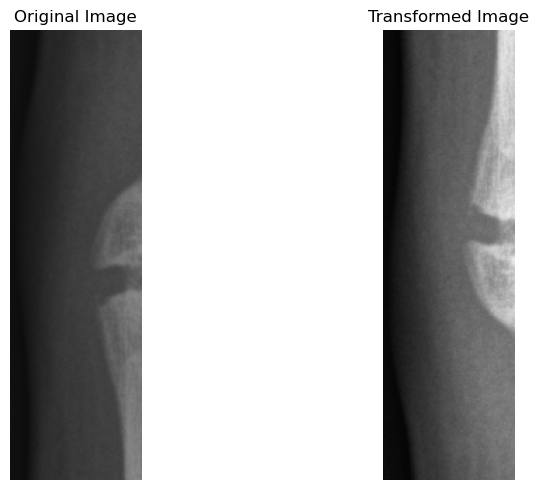

In [ ]:
import albumentations as A
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

image_path = '/home/up202003072/Documents/ProtoPNet/datasets/bone_cropped/training/2/0023_0657842010_02_WRI-L2_M012_0.png'  # Replace with the actual path to your image
image = Image.open(image_path)
image = np.array(image)

transform = A.Compose([
    A.HorizontalFlip(p=0.5), 
    A.VerticalFlip(p=0.6), 
    A.Affine(scale=(1.1,1.25), keep_ratio=True, p=0.5),
    # A.RandomBrightnessContrast(brightness_limit=0.5, contrast_limit=0.5, p=0.5),
    # A.HueSaturationValue(hue_shift_limit=(0.7, 1), sat_shift_limit=(0.7, 0.8), val_shift_limit=(0.3, 1),p=0.5),
    # A.RandomContrast(p=0.5, limit=(0.5, 0.6))
    A.ColorJitter(brightness=(1.5, 2.0), contrast=(1.1, 1.2), saturation=(1.1, 1.2), hue=(-0.1, 0.1), p=1),
    
])

transformed = transform(image=image)
transformed_image = transformed['image']

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(image)
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('Transformed Image')
plt.imshow(transformed_image)
plt.axis('off')

plt.tight_layout()
plt.show()

In [160]:
t = 10409 // 287
print(t)


36


In [198]:
import os
import albumentations as A
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import random

transform = A.Compose([
    A.HorizontalFlip(p=0.5), 
    A.VerticalFlip(p=0.6), 
    A.Affine(scale=(1.1,1.25), keep_ratio=True, p=0.5),
    # A.RandomBrightnessContrast(brightness_limit=0.5, contrast_limit=0.5, p=0.5),
    # A.HueSaturationValue(hue_shift_limit=(0.7, 1), sat_shift_limit=(0.7, 0.8), val_shift_limit=(0.3, 1),p=0.5),
    # A.RandomContrast(p=0.5, limit=(0.5, 0.6))
    A.ColorJitter(brightness=(1.5, 2.0), contrast=(1.1, 1.2), saturation=(1.1, 1.2), hue=(-0.1, 0.1), p=0.4),   
])

input_folder = '/home/up202003072/Documents/ProtoPNet/datasets/bone_cropped/training/1'  
output_folder = '/home/up202003072/Documents/ProtoPNet/datasets/bone_cropped/training/1_over'  

os.makedirs(output_folder, exist_ok=True)

image_files = [f for f in os.listdir(input_folder) if f.lower().endswith(('.png'))]

current_samples = len(image_files) # 287
print(current_samples)
target_samples = 10409 #10409

oversampling_factor = target_samples // current_samples # 35
print(oversampling_factor)

for image_file in image_files:
    image_path = os.path.join(input_folder, image_file)
    image = Image.open(image_path)
    image = np.array(image)
    
    for i in range(oversampling_factor):
        transformed = transform(image=image)
        transformed_image = transformed['image']
        
        augmented_filename = f"{os.path.splitext(image_file)[0]}_{i}.png"
        augmented_path = os.path.join(output_folder, augmented_filename)
        augmented_image = Image.fromarray(transformed_image)
        augmented_image.save(augmented_path)


print(f"Generated a total of {len(os.listdir(output_folder))} augmented samples.")

287
35
Generated a total of 10045 augmented samples.


LABEL 2 -SOFT

In [2]:
import os
import albumentations as A
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import random

transform = A.Compose([
    A.HorizontalFlip(p=0.5), 
    A.VerticalFlip(p=0.6), 
    A.Affine(scale=(1.1,1.25), keep_ratio=True, p=0.5),
    # A.RandomBrightnessContrast(brightness_limit=0.5, contrast_limit=0.5, p=0.5),
    # A.HueSaturationValue(hue_shift_limit=(0.7, 1), sat_shift_limit=(0.7, 0.8), val_shift_limit=(0.3, 1),p=0.5),
    # A.RandomContrast(p=0.5, limit=(0.5, 0.6))
    A.ColorJitter(brightness=(1.5, 2.0), contrast=(1.1, 1.2), saturation=(1.1, 1.2), hue=(-0.1, 0.1), p=0.4),   
])

input_folder = '/home/up202003072/Documents/ProtoPNet/datasets/bone_cropped/training/2'  
output_folder = '/home/up202003072/Documents/ProtoPNet/datasets/bone_cropped/training/2_over'  

os.makedirs(output_folder, exist_ok=True)

image_files = [f for f in os.listdir(input_folder) if f.lower().endswith(('.png'))]

current_samples = len(image_files) # 287
print(current_samples)
target_samples = 10071 #10409

oversampling_factor = target_samples // current_samples # 35
print(oversampling_factor)

for image_file in image_files:
    image_path = os.path.join(input_folder, image_file)
    image = Image.open(image_path)
    image = np.array(image)
    
    for i in range(oversampling_factor):
        transformed = transform(image=image)
        transformed_image = transformed['image']
        
        augmented_filename = f"{os.path.splitext(image_file)[0]}_{i}.png"
        augmented_path = os.path.join(output_folder, augmented_filename)
        augmented_image = Image.fromarray(transformed_image)
        augmented_image.save(augmented_path)

print(f"Generated a total of {len(os.listdir(output_folder))} augmented samples.")

338
29
Generated a total of 9802 augmented samples.


In [3]:
print(f"Generated a total of {len(os.listdir(output_folder))} augmented samples.")

Generated a total of 10140 augmented samples.


test

In [ ]:
import Augmentor
import os
import random
import shutil

def makedir(path):
    if not os.path.exists(path):
        os.makedirs(path)

datasets_root_dir = '/home/up202003072/Documents/ProtoPNet/datasets/bone_cropped/'
dir = datasets_root_dir + 'training/'
target_dir = datasets_root_dir + 'train_cropped_augmented2/'

makedir(target_dir)
folders = [os.path.join(dir, folder) for folder in next(os.walk(dir))[1]]
target_folders = [os.path.join(target_dir, folder) for folder in next(os.walk(dir))[1]]

num_augmented_samples = 10071  

for i in range(len(folders)):
    fd = folders[i]
    tfd = target_folders[i]

    os.makedirs(tfd, exist_ok=True)
    for root, _, files in os.walk(fd):
        for file in files:
            src_path = os.path.join(root, file)
            dest_path = os.path.join(tfd, file)
            shutil.copyfile(src_path, dest_path)

    class_name = os.path.basename(fd)
    if class_name in ['1', '2']:  
        # rotate
        p = Augmentor.Pipeline(fd)
        p.rotate_without_crop(probability=1, max_left_rotation=15, max_right_rotation=15)
        p.flip_left_right(probability=0.5)

        #p.flip_random(probability = 0.6)
        #p.random_contrast(probability = 0.5,min_factor = 0.2,max_factor = 0.4)
        #p.random_brightness(probability = 0.5,min_factor = 0.2,max_factor = 0.4 )
        #p.skew(probability = 0.5, magnitude=0.2)
        # p.flip_left_right(probability=0.5)

        for _ in range(num_augmented_samples):
            p.sample(1)  
            generated_image = os.path.join(fd, 'output', 'output_0.jpg')
            dest_path = os.path.join(tfd, f'augmented_{random.randint(1, 100000)}.jpg')
            shutil.move(generated_image, dest_path)

        p.close()

print("Oversampling with augmentation completed.")

PADDING

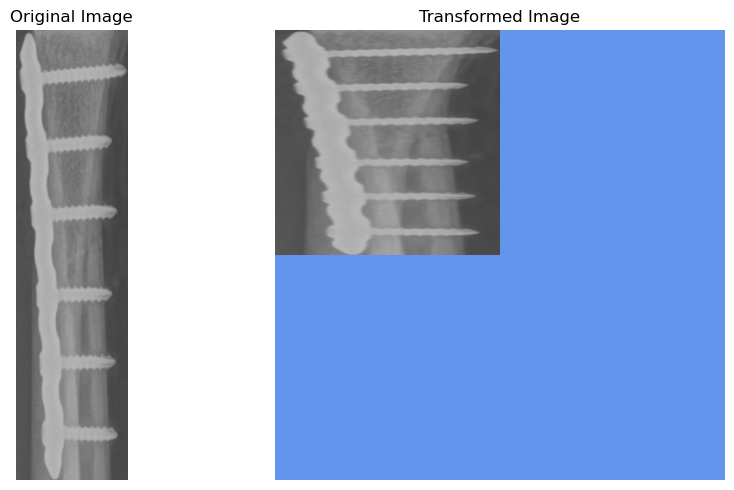

In [4]:
from PIL import Image
from torchvision import transforms
import matplotlib.pyplot as plt

img_size = 224

image_path = '/home/up202003072/Documents/ProtoPNet/local_analysis/3050_0923627159_01_WRI-R2_M015_0/3050_0923627159_01_WRI-R2_M015_0.png'
image = Image.open(image_path)

padding_color = (100,149,237)

custom_transform = transforms.Compose([
    transforms.Resize((img_size, img_size)),
     transforms.Pad(padding=(0, 0, img_size, img_size), fill=padding_color), 
    transforms.ToTensor(),
])


transformed_image = custom_transform(image)


plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(image)
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(transformed_image.permute(1, 2, 0))
plt.title('Transformed Image')
plt.axis('off')

plt.tight_layout()
plt.show()

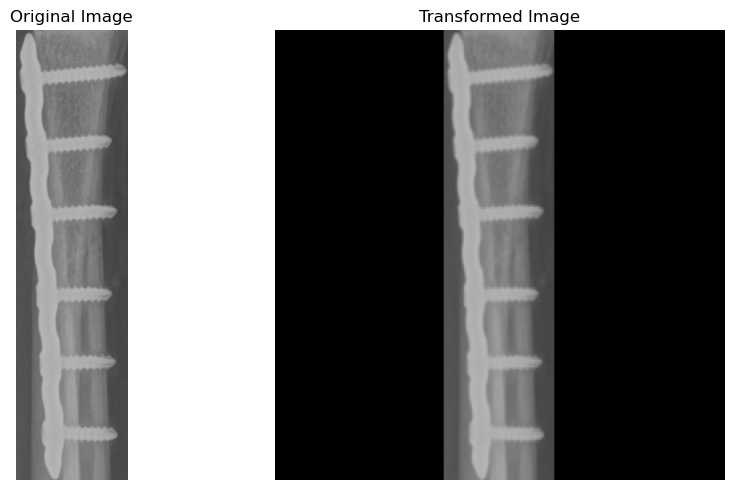

Transformed Image Size: torch.Size([3, 224, 224])


In [6]:
from torchvision import transforms
import matplotlib.pyplot as plt
from PIL import Image

img_size = 224

image_path = '/home/up202003072/Documents/ProtoPNet/local_analysis/3050_0923627159_01_WRI-R2_M015_0/3050_0923627159_01_WRI-R2_M015_0.png'
image = Image.open(image_path)

aspect_ratio = image.width / image.height
new_width = int(min(img_size, img_size * aspect_ratio))
new_height = int(min(img_size, img_size / aspect_ratio))

custom_transform = transforms.Compose([
    transforms.Resize((new_height, new_width)),
    transforms.CenterCrop((img_size, img_size)),
    transforms.ToTensor(),
])

transformed_image = custom_transform(image)

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(image)
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(transformed_image.permute(1, 2, 0))
plt.title('Transformed Image')
plt.axis('off')

plt.tight_layout()
plt.show()
print("Transformed Image Size:", transformed_image.shape)

622
154
55
224


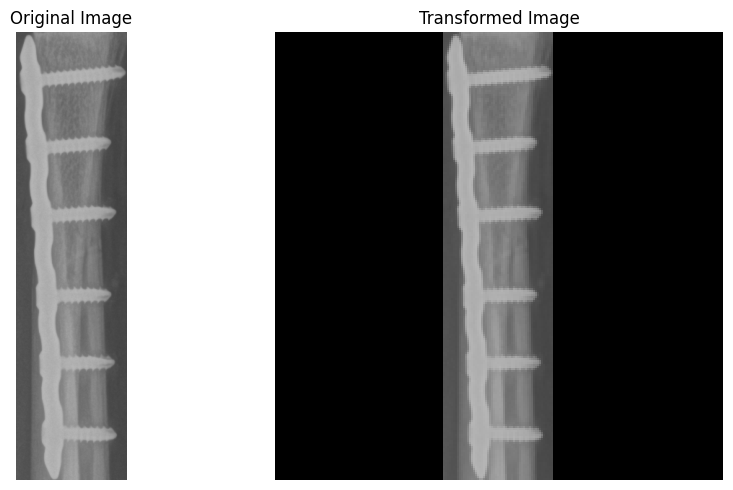

Transformed Image Size: torch.Size([3, 224, 224])


In [5]:
from PIL import Image
import torchvision.transforms as transforms


image_path = '/home/up202003072/Documents/ProtoPNet/local_analysis/3050_0923627159_01_WRI-R2_M015_0/3050_0923627159_01_WRI-R2_M015_0.png'
image = Image.open(image_path)

img_size = 224

def resize_with_aspect_ratio(image_size, padding_color=(0, 0, 0)):
    def resize_and_crop(img):
        aspect_ratio = img.width / img.height
        print(img.height)
        print(img.width)
        new_width = int(min(image_size, image_size * aspect_ratio))
        new_height = int(min(image_size, image_size / aspect_ratio))
        print(new_width)
        print(new_height)

        resize_transform = transforms.Resize((new_height, new_width))
        crop_transform = transforms.CenterCrop((image_size, image_size))

        padded_img = Image.new("RGB", (image_size, image_size), padding_color)
        padded_img.paste(resize_transform(img), ((image_size - new_width) // 2, (image_size - new_height) // 2))
        
        return crop_transform(resize_transform(img))
    
    return transforms.Compose([
        transforms.Lambda(resize_and_crop),
        transforms.ToTensor(),
    ])

transformed_image = resize_with_aspect_ratio(img_size, padding_color=(0,0,0))(image)

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(image)
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(transformed_image.permute(1, 2, 0))
plt.title('Transformed Image')
plt.axis('off')

plt.tight_layout()
plt.show()
print("Transformed Image Size:", transformed_image.shape)

transformed_pil_image = transforms.ToPILImage()(transformed_image)

# transformed_pil_image.save('/home/up202003072/Documents/3050_0923627159_01_WRI-R2_M015.png')


In [2]:
from PIL import Image
import torchvision.transforms as transforms

image_path = '/home/up202003072/Documents/ProtoPNet/datasets/bone_cropped/testing/1/050_0923627159_01_WRI-R2_M015_0.png' #/home/up202003072/Documents/sequential/cropped_img/1/0429_0239777942_07_WRI-L1_M015.png
image = Image.open(image_path)

img_size = 224

def resize_with_aspect_ratio(image_size):
    def resize_and_crop(img):
        aspect_ratio = img.width / img.height
        new_width = int(min(image_size, image_size * aspect_ratio))
        new_height = int(min(image_size, image_size / aspect_ratio))

        resize_transform = transforms.Resize((new_height, new_width))
        crop_transform = transforms.CenterCrop((image_size, image_size))
        
        return crop_transform(resize_transform(img))
    
    return transforms.Compose([
        transforms.Lambda(resize_and_crop),
        transforms.ToTensor(),
    ])

transformed_image = resize_with_aspect_ratio(img_size)(image)

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(image)
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(transformed_image.permute(1, 2, 0))
plt.title('Transformed Image')
plt.axis('off')

plt.tight_layout()
plt.show()
print("Transformed Image Size:", transformed_image.shape)


FileNotFoundError: [Errno 2] No such file or directory: '/home/up202003072/Documents/ProtoPNet/datasets/bone_cropped/testing/1/050_0923627159_01_WRI-R2_M015_0.png'

In [2]:
from PIL import Image
import torchvision.transforms as transforms
import cv2


image_path = '/home/up202003072/Documents/ProtoPNet/local_analysis/3050_0923627159_01_WRI-R2_M015_0/3050_0923627159_01_WRI-R2_M015_0.png'
image = Image.open(image_path)

img_size = 224

input_image_path = '/home/up202003072/Documents/GRAZPEDWRI-DX/pascalvoc/images/3050_0923627159_01_WRI-R2_M015.png'  
o_img = cv2.imread(input_image_path) #numpy?

# Example bounding box and label
# _bboxes = [[[100, 150, 300, 400]]]  # Format: [x1, y1, x2, y2]
_bboxes = [[[  373.36096,  179.11508, 1017.6968 ,  333.03006]]] 
_labels = [[2]]  # Example label

#passar para tensores 

def resize_with_aspect_ratio(image_size, padding_color=(0, 0, 0)):
    def resize_and_crop(img):
        aspect_ratio = img.width / img.height
        print(img.height)
        print(img.width)
        new_width = int(min(image_size, image_size * aspect_ratio))
        new_height = int(min(image_size, image_size / aspect_ratio))
        print(new_width)
        print(new_height)

        resize_transform = transforms.Resize((new_height, new_width))
        crop_transform = transforms.CenterCrop((image_size, image_size))

        padded_img = Image.new("RGB", (image_size, image_size), padding_color)
        padded_img.paste(resize_transform(img), ((image_size - new_width) // 2, (image_size - new_height) // 2))
        
        return crop_transform(resize_transform(img))
    
    return transforms.Compose([
        transforms.Lambda(resize_and_crop),
        transforms.ToTensor(),
    ])

lene=0
if len(_bboxes[0])>0:
    lene=1
for i in range(0,lene):
    img=o_img[:,:,int( _bboxes[0][i][0]):int(_bboxes[0][i][2]),int(_bboxes[0][i][1]):int(_bboxes[0][i][3])] 
    img = np.transpose(img[0], (1, 2, 0))
    old_image_height, old_image_width, channels = img.shape
    
    transformed_image = resize_with_aspect_ratio(img_size, padding_color=(0,0,0))(img)

    import matplotlib.pyplot as plt

    plt.figure(figsize=(10, 5))

    plt.subplot(1, 2, 1)
    plt.imshow(image)
    plt.title('Original Image')
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(transformed_image.permute(1, 2, 0))
    plt.title('Transformed Image')
    plt.axis('off')

    plt.tight_layout()
    plt.show()
    print("Transformed Image Size:", transformed_image.shape)

    transformed_pil_image = transforms.ToPILImage()(transformed_image)

    # transformed_pil_image.save('/home/up202003072/Documents/3050_0923627159_01_WRI-R2_M015.png')


IndexError: too many indices for array: array is 3-dimensional, but 4 were indexed

In [18]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

input_image_path = '/home/up202003072/Documents/GRAZPEDWRI-DX/pascalvoc/images/3050_0923627159_01_WRI-R2_M015.png'  
o_img = cv2.imread(input_image_path)
o_img = np.transpose(o_img, (2, 0, 1))
# print(o_img.shape)
o_img = np.expand_dims(o_img, axis=0)

# Example bounding box and label
# _bboxes = [[[100, 150, 300, 400]]]  # Format: [x1, y1, x2, y2]
_bboxes = [[[  373.36096,  179.11508, 1017.6968 ,  333.03006]]] 
_labels = [[2]]  # Example label

batch_cropped_images = []
labbeled_of_the_cropped = []

desired_size = (650, 650)

for i in range(len(_bboxes[0])):
    bbox = _bboxes[0][i]
    y1, x1, y2, x2 = int(bbox[0]), int(bbox[1]), int(bbox[2]), int(bbox[3])
    cropped_img = o_img[:, :, y1:y2, x1:x2]
    # print(cropped_img.shape)
    cropped_img = np.transpose(cropped_img[0], (1, 2, 0))
    # print(cropped_img.shape)
    old_height, old_width, channels = cropped_img.shape

    # aspect_ratio = old_width / old_height

    # if aspect_ratio > 1:
    #     new_width = desired_size[0]
    #     new_height = int(new_width / aspect_ratio)
    # else:
    #     new_height = desired_size[1]
    #     new_width = int(new_height * aspect_ratio)
        
        # # If the calculated new width is larger than the desired width, adjust the new width and height
        # if new_width > desired_size[0]:
        #     new_width = desired_size[0]
        #     new_height = int(new_width / aspect_ratio)

    # print("New image size:", new_height, "x", new_width)
    # print(type(img_np))
    # img_np = Image.fromarray(img_np)
    # des_size = (new_width, new_height)
    # resized_img = img_np.resize(des_size) 
    # resized_img = np.array(resized_img)
    # #resized_img = cv2.resize(img_np, (new_width, new_height))
    # print(resized_img.shape)

    
    #result = np.zeros((desired_size[1], desired_size[0], 3), dtype=np.uint8)
    color = (0,0,0)
    result = np.full((desired_size[1], desired_size[0], channels), color, dtype=np.float32())
    # print(result.shape)
    
    # compute center offset
    x_center = (650 - old_width) // 2
    y_center = (650 - old_height) // 2

    result[y_center:y_center+old_height,x_center:x_center+old_width]=cropped_img
    cropped_img=np.transpose(result, (0, 1, 2))

    print(cropped_img.shape)

    # # Calculate the position to paste the resized image
    # y_center = (desired_size[1] - resized_img.shape[0]) // 2
    # x_center = (desired_size[0] - resized_img.shape[1]) // 2

    # Paste the resized image into the result array
    # result[y_center:y_center+resized_img.shape[0], x_center:x_center+resized_img.shape[1]] = resized_img

    # y_offset = (desired_size[1] - new_height) // 2
    # x_offset = (desired_size[0] - new_width) // 2
    # result[y_offset:y_offset + new_height, x_offset:x_offset + new_width] = resized_img

    cropped_img = np.transpose(result, (0, 1, 2))

    output_path = "/home/up202003072/Documents/metal2.png"
    cv2.imwrite(output_path, cropped_img)

#     label = _labels[0][i]
#     batch_cropped_images.append(img)
#     labbeled_of_the_cropped.append(label)
#     # print(img.shape)

# fig, axes = plt.subplots(1, 2, figsize=(10, 5))
# axes[0].imshow(np.transpose(o_img[0], (1, 2, 0)))
# axes[0].set_title('Original Image')
# axes[1].imshow(np.transpose(batch_cropped_images[0], (1, 2, 0)))
# axes[1].set_title('Cropped and Resized Image')
# plt.show()


(650, 650, 3)


In [ ]:
import cv2
import numpy as np

desired_size = (650, 650)

for i in range(len(_bboxes[0])):
    bbox = _bboxes[0][i]
    x1, y1, x2, y2 = int(bbox[0]), int(bbox[1]), int(bbox[2]), int(bbox[3])
    cropped_img = o_img[:, :, x1:x2, y1:y2]
    
    img_np = np.transpose(cropped_img[0].cpu(), (1, 2, 0))
    old_height, old_width, _ = img_np.shape

    aspect_ratio = old_width / old_height

    if aspect_ratio > 1:
        new_width = desired_size[0]
        new_height = int(new_width / aspect_ratio)
    else:
        new_height = desired_size[1]
        new_width = int(new_height * aspect_ratio)

    resized_img = cv2.resize(img_np, (new_width, new_height))

    result = np.zeros((desired_size[1], desired_size[0], 3), dtype=np.uint8)
    y_offset = (desired_size[1] - new_height) // 2
    x_offset = (desired_size[0] - new_width) // 2
    result[y_offset:y_offset + new_height, x_offset:x_offset + new_width] = resized_img

    img = np.transpose(result, (2, 0, 1))
    label = label.cpu().numpy().item()
    batch_cropped_images.append(img)
    labbeled_of_the_cropped.append(label)